# <font color = 'purple'> Twitch Chat EDA </font>

### Data
> *Data from category games > dota2, hearthstone
> *Top 3 Streams from ~10AM to ~1PM <br>
> *Obtained ~3 hours of data from 3 streamer channels from both dota2, and hearthstone<br>
> *Included a 7th streamer (edisonparklive) who was playing games at the time of this data for comparison

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import pandas as pd
import os
import datetime
from datetime import datetime
from collections import Counter #for creating word list dictionary
from wordcloud import WordCloud, STOPWORDS #for wordcloud
import nltk
from nltk.corpus import stopwords #to get list of common words

from itertools import product

%matplotlib inline
plt.style.use('ggplot')

### Function Call to run


In [26]:
#from https://stackoverflow.com/questions/3463930/how-to-round-the-minute-of-a-datetime-object-python/10854034#10854034

def roundTime(dt=None, roundTo=60):
   """Round a datetime object to any time lapse in seconds
   dt : datetime.datetime object, default now.
   roundTo : Closest number of seconds to round to, default 1 minute.
   Author: Thierry Husson 2012 - Use it as you want but don't blame me.
   """
   if dt == None : dt = datetime.datetime.now()
   seconds = (dt.replace(tzinfo=None) - dt.min).seconds
   rounding = (seconds+roundTo/2) // roundTo * roundTo
   return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)

## Creating the Twitch Chat Dataframe

### Dataframe Function

this function will take all of the files it has been given (as a list), and generate a combined pandas dataframe

In [286]:
def create_chat_df(folder):
    '''
    takes a channel_name of a streamer, returns a dataframe of that channel name from the log file
    
    Parameters
    ----------
    flist: list (list of file names)
        must also have a matching log file to the list in the chat_data_log folder

    Returns
    -------
    pandas dataframe
    '''
    
    #generates list of .log files from the folder given 
    print("generating... list of .log files\n")
    file_list = []
    for file in os.listdir(folder):
        if file.endswith(".log"):
            file_list.append(file)
    
    print("creating df...\n")
    df = pd.DataFrame(columns=['game', 'channel', 'timestamp', 'user_name', 'chat_msg']) #initializes the dataframe

    line_counter = 0
    total_line_errors = 0
    
    for file in file_list:
        
        game_type = file[:file.index('_')] #extracts game type
        channel = file[file.index('_')+1:-9] #extracts channel name
        line_errors = 0
        
        print("inserting chat data for: ", game_type, channel)
        chat_log_file = folder+"/"+file
    
        with open(chat_log_file, "r") as f:
            for line in f:
                if(len(line)>1):
                    
                    #get timestamp
                    timestamp = line[0:19]
                    try:
                        timestamp = datetime.datetime.strptime(timestamp.replace('_',' '),'%Y-%m-%d %H:%M:%S') #'2019-05-31_09:48:04'
                        timestamp = roundTime(timestamp, roundTo=60) #rounds to minute
                        timestamp = timestamp.to_pydatetime()
                        go_after_timestamp=True #variable to know to keep going
                    except:
                        print(line_counter, "timestamp error...", line)
                        line_errors += 1
                        go_after_timestamp=False
                    
                    if(go_after_timestamp==True):
                        
                        #get username
                        try:
                            username = line[23:line.index('!')] #gets the username from the chat
                            go_after_username=True
                        except:
                            print(line_counter, "username error...")
                            line_errors += 1
                            go_after_username=False
                        
                        #get msg
                        if(go_after_username==True):
                            find_chat_start = line[23:].find(':')+23
                            msg = line[find_chat_start+1:].rstrip("\n")
                            
                            #enters data into df
#                             print((line_counter, timestamp, username, msg))
                            df.loc[line_counter] = (game_type, channel, timestamp, username, msg)

                    #reset variables
                    timestamp=""
                    username=""
                    msg=""
                    line_counter += 1 #line counter
            print(channel + " had " + line_errors + " line errors.")  
    print("\n...df complete!\n")
    print("Had " + total_line_errors + " line errors.")
    return df

### Creating the Chat dataframe

Generating a dataframe from the chat log files

In [649]:
folder = 'chat_log_data'

In [650]:
# creates pandas df based on all logs files in the specified folder
# then sorts df by game, channel, timestamp

df = create_chat_df(folder).sort_values(by = ['game', 'channel', 'timestamp']).reset_index()

generating... list of .log files

creating df...

inserting chat data for:  HS playhearthstoneru
215 timestamp error
252 timestamp error
318 timestamp error
1154 timestamp error
1241 timestamp error
1297 timestamp error
1547 timestamp error
1556 timestamp error
1914 timestamp error
2126 timestamp error
2136 timestamp error
2146 timestamp error
2224 timestamp error
2276 timestamp error
2329 timestamp error
2448 timestamp error
2912 timestamp error
3311 timestamp error
3347 timestamp error
3356 timestamp error
...ending at line  3410
inserting chat data for:  DOTA esl_dota2
3411 timestamp error
3412 timestamp error
3413 timestamp error
3414 timestamp error
3415 timestamp error
3417 timestamp error
3418 timestamp error
3419 timestamp error
3420 timestamp error
3421 timestamp error
3422 timestamp error
3423 timestamp error
3424 timestamp error
3522 timestamp error
3617 timestamp error
3778 timestamp error
3840 timestamp error
3971 timestamp error
4026 timestamp error
4034 timestamp error
4

24695 timestamp error
24766 timestamp error
24931 timestamp error
25015 timestamp error
25018 timestamp error
25053 timestamp error
25063 timestamp error
25092 timestamp error
25093 timestamp error
25124 timestamp error
25153 timestamp error
25250 timestamp error
25253 timestamp error
25402 timestamp error
25428 timestamp error
25527 timestamp error
25587 timestamp error
25679 timestamp error
25767 timestamp error
26031 timestamp error
26049 timestamp error
26109 timestamp error
26366 timestamp error
26456 timestamp error
26463 timestamp error
26605 timestamp error
26619 timestamp error
26822 timestamp error
26841 timestamp error
26894 timestamp error
26934 timestamp error
26947 timestamp error
26997 timestamp error
27067 timestamp error
27148 timestamp error
27209 timestamp error
27211 timestamp error
27488 timestamp error
27491 timestamp error
27492 timestamp error
27497 timestamp error
27633 timestamp error
27680 timestamp error
27718 timestamp error
27767 timestamp error
27832 time

46707 timestamp error
46765 timestamp error
46771 timestamp error
46810 timestamp error
46827 timestamp error
46930 timestamp error
46949 timestamp error
46964 timestamp error
47071 timestamp error
47072 timestamp error
47093 timestamp error
47113 timestamp error
47223 timestamp error
47281 timestamp error
47294 timestamp error
47430 timestamp error
47542 timestamp error
47543 timestamp error
47827 timestamp error
47850 timestamp error
47866 timestamp error
47898 timestamp error
47937 timestamp error
47945 timestamp error
47994 timestamp error
47995 timestamp error
48011 timestamp error
48103 timestamp error
48227 timestamp error
48230 timestamp error
48375 timestamp error
48385 timestamp error
48451 timestamp error
48601 timestamp error
48701 timestamp error
48806 timestamp error
48810 timestamp error
48942 timestamp error
49025 timestamp error
49082 timestamp error
49085 timestamp error
49099 timestamp error
49331 timestamp error
49352 timestamp error
49488 timestamp error
49561 time

73044 timestamp error
73448 timestamp error
73488 timestamp error
73693 timestamp error
73763 timestamp error
73848 timestamp error
73919 timestamp error
73938 timestamp error
73949 timestamp error
73972 timestamp error
74068 timestamp error
74177 timestamp error
74214 timestamp error
74307 timestamp error
74373 timestamp error
74464 timestamp error
74596 timestamp error
74685 timestamp error
74777 timestamp error
74780 timestamp error
74789 timestamp error
74825 timestamp error
74848 timestamp error
74890 timestamp error
74904 timestamp error
74923 timestamp error
75009 timestamp error
75055 timestamp error
75099 timestamp error
75216 timestamp error
75393 timestamp error
75659 timestamp error
75759 timestamp error
75766 timestamp error
75876 timestamp error
75898 timestamp error
76008 timestamp error
76057 timestamp error
76068 timestamp error
76290 timestamp error
76392 timestamp error
76490 timestamp error
76510 timestamp error
76623 timestamp error
76657 timestamp error
76693 time

In [651]:
df.head()

,index,game,channel,timestamp,user_name,chat_msg
0,55734,DOTA,admiralbulldog,2019-05-31 09:48:00,cy_dota2,Krappa
1,55735,DOTA,admiralbulldog,2019-05-31 09:48:00,asavell,)
2,55752,DOTA,admiralbulldog,2019-05-31 09:48:00,,he sold it
3,55758,DOTA,admiralbulldog,2019-05-31 09:48:00,gandor87,WHY IS IT PAUSED PepeHands
4,55759,DOTA,admiralbulldog,2019-05-31 09:48:00,nobody1564,LULW


## EDA - Twitch Chat

### 1. Word Cloud of most commonly used words

In [600]:
#list of channels

channels = list(df.channel.unique())
channels

['admiralbulldog',
 'dota2ruhub',
 'esl_dota2',
 'playhearthstone',
 'playhearthstoneru',
 'solaryhs',
 'edisonparklive']

In [601]:
#game type in relation to index of the channels list
x = list(df.channel.unique())
game_type = []
for c in x:
    game_type.append(df[df['channel']==c]['game'].iloc[0]) #gets the game type of the channel
    
game_type

['DOTA', 'DOTA', 'DOTA', 'HS', 'HS', 'HS', 'OTHER']

#### nltk library can genereate a list of most common words (I, he, her, etc) which should be removed

In [602]:
# import nltk
# nltk.download()

# import nltk
# from nltk.corpus import stopwords

#### function to generate word_count_list by channel

In [208]:
def generate_word_count_list(df, channels):

    word_count_list = []
    
    #creates the common words list
    common_english_words = set(stopwords.words('english'))
    common_russian_words = set(stopwords.words('russian'))
    common_french_words = set(stopwords.words('french'))

    for channel in channels:
        channel_word_count = df[df['channel']==channel].groupby(['game','channel'])['chat_msg'].apply(' '.join).reset_index()['chat_msg'][0] #all words of that channel as a string

        punctuations = '''!()-[]{};:'"\,<>.?@#$%^&*_~'''
        # remove punctuation from the string
        no_punct = ""
        for char in channel_word_count:
           if char not in punctuations:
               no_punct = no_punct + char

        no_punct = no_punct.split()

        clean_word_list = []
        for word in no_punct: #removes common words (he, him, his)
            word = word.lower()
            if(word in common_english_words):
                pass
            elif(word in common_russian_words):
                pass
            elif(word in common_french_words):
                pass
            elif(word in '0123456789'):
                pass
            elif(word in ['i', 'u', 'its', 'was']):
                pass
            else:
                clean_word_list.append(word)

        word_dict = Counter(clean_word_list).most_common() #creates the word count dictionary
        word_count_list.append((channel, word_dict))
        
    return word_count_list


In [209]:
generate_word_count_list(df,channels)

[('admiralbulldog',
  [('jebaited', 1496),
   ('lulw', 852),
   ('answer', 783),
   ('\x01action', 685),
   ('krappa', 559),
   ('omegalul', 549),
   ('pog', 535),
   ('lul', 409),
   ('\x01', 400),
   ('one', 398),
   ('pogu', 382),
   ('minglee', 359),
   ('points', 357),
   ('opieop', 290),
   ('hint', 290),
   ('heres', 288),
   ('opieop\x01', 288),
   ('peeporip', 284),
   ('pepehands', 266),
   ('got', 252),
   ('get', 235),
   ('feelsgoodman', 228),
   ('20', 226),
   ('wtff', 224),
   ('right', 224),
   ('⠀', 219),
   ('pepelaugh', 211),
   ('trivia', 204),
   ('monkagiga', 202),
   ('4head', 201),
   ('gachipls', 199),
   ('youre', 184),
   ('bruh', 182),
   ('useless', 180),
   ('gets', 179),
   ('monkah', 179),
   ('could', 178),
   ('since', 178),
   ('datguy', 178),
   ('point\x01', 178),
   ('pogchamp\x01', 177),
   ('clap', 168),
   ('lepo', 166),
   ('pepega', 144),
   ('pepescoots', 138),
   ('og', 128),
   ('wutface', 125),
   ('fathead', 118),
   ('admiralbulldog', 1

#### Generate the word cloud

code from https://www.geeksforgeeks.org/generating-word-cloud-python/

In [614]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
# from wordcloud import WordCloud, STOPWORDS 
# import matplotlib.pyplot as plt 
# import pandas as pd 
  
# # Reads 'Youtube04-Eminem.csv' file  
# df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 

def generate_word_cloud(channel, word_list):
    comment_words = ' '
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in word_list: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud)
    plt.title(channel,fontsize=20)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    word_cloud_filename = 'images/'+channel+'_word_cloud.png'
    plt.savefig(word_cloud_filename, format='png', dpi=500)

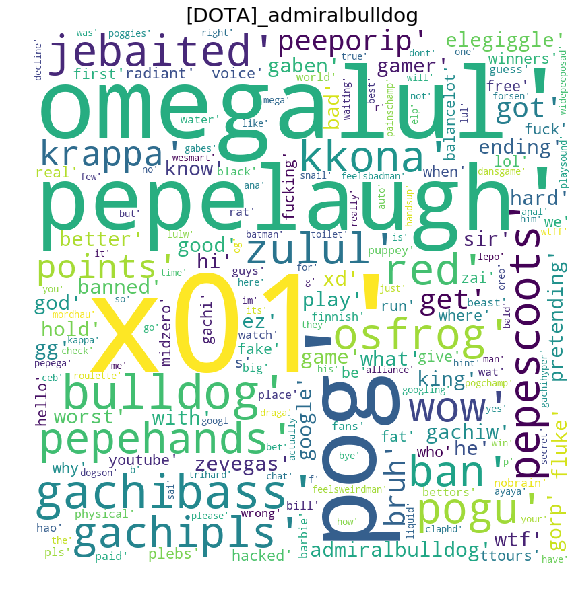

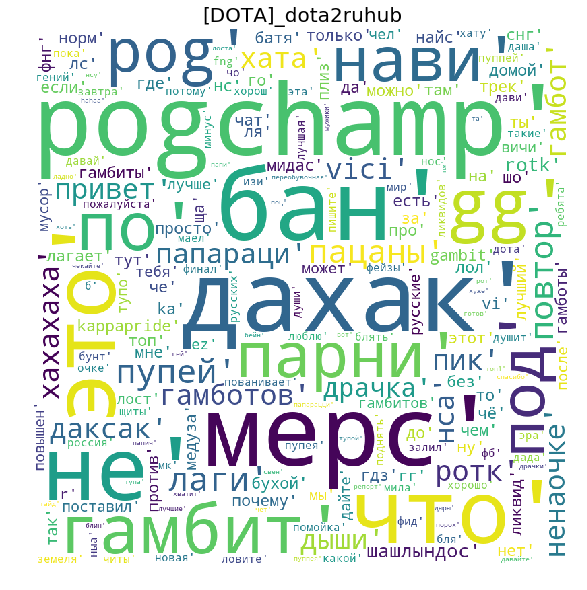

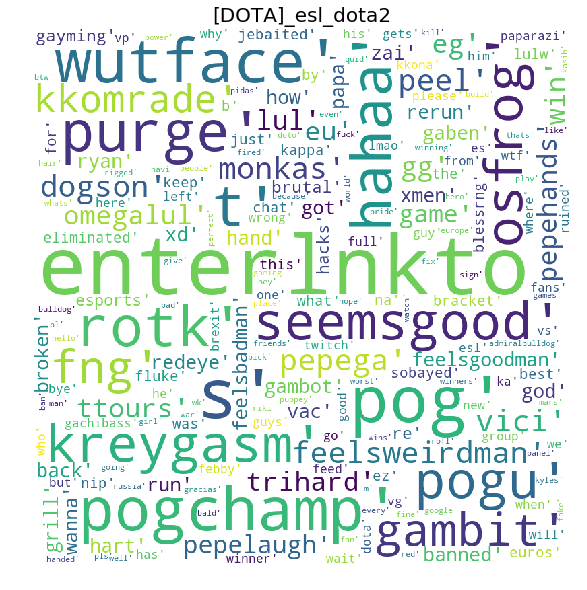

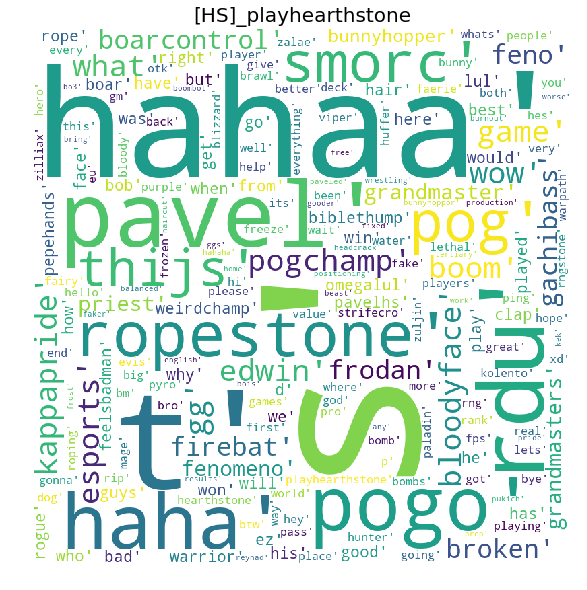

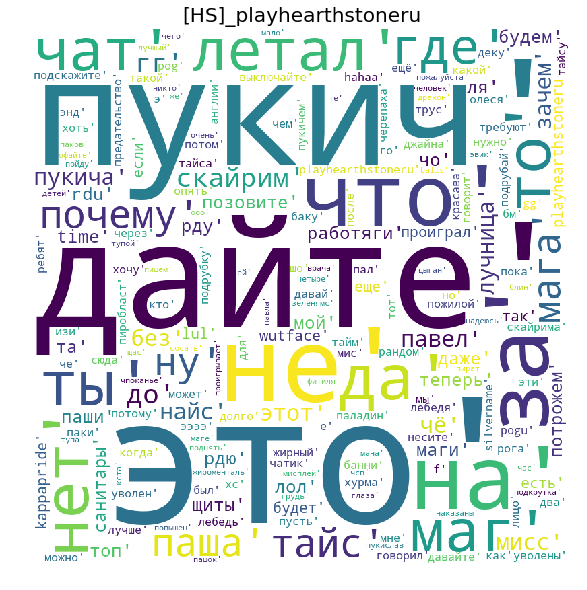

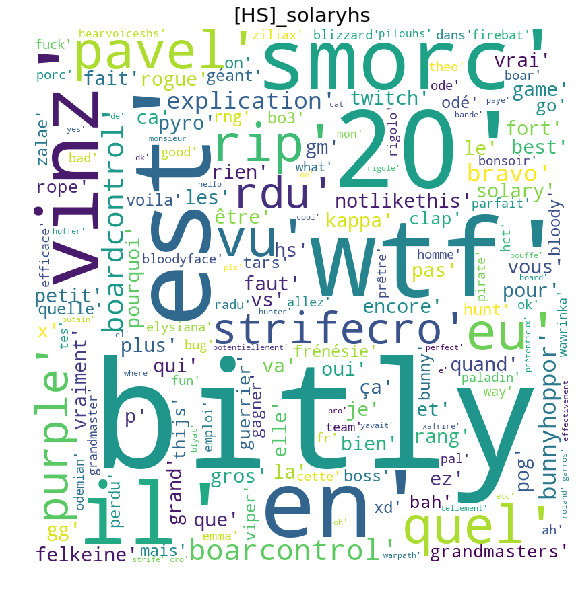

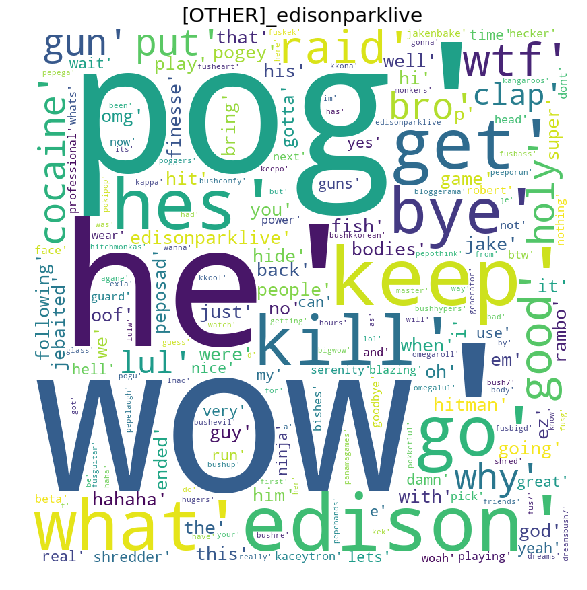

In [615]:
#runs the word cloud for each channel

for i in range(len(channels)):
    generate_word_cloud('['+game_type[i]+']_'+channels[i], generate_word_count_list(df)[i])

### 2. Chat Frequency by Channel

In [608]:
df_count = df.groupby('channel').count()['timestamp']
df_count

channel
admiralbulldog       10928
dota2ruhub           18713
edisonparklive        1683
esl_dota2            31422
playhearthstone      16657
playhearthstoneru     3410
solaryhs              2189
Name: timestamp, dtype: int64

In [609]:
df_count.tolist()

[10928, 18713, 1683, 31422, 16657, 3410, 2189]

#### Create bar chart

Need to seperate out the channels by game type for the plot

In [610]:
dota2 = df[df['game']=='DOTA'].groupby(['game']) #applies a mask of 'DOTA' to the df
dota2_channels = list(dota2.channel.unique()[0])

hs = df[df['game']=='HS'].groupby(['game']) #applies a mask of 'DOTA' to the df
hs_channels = list(hs.channel.unique()[0])

other = df[df['game']=='OTHER'].groupby(['game']) #applies a mask of 'DOTA' to the df
other = list(other.channel.unique()[0])

getting the y values by channel

In [611]:
dota2_y = df[df['game']=='DOTA'].groupby('channel').count()['timestamp'].tolist()
hs_y = df[df['game']=='HS'].groupby('channel').count()['timestamp'].tolist()
other_y = df[df['game']=='OTHER'].groupby('channel').count()['timestamp'].tolist()

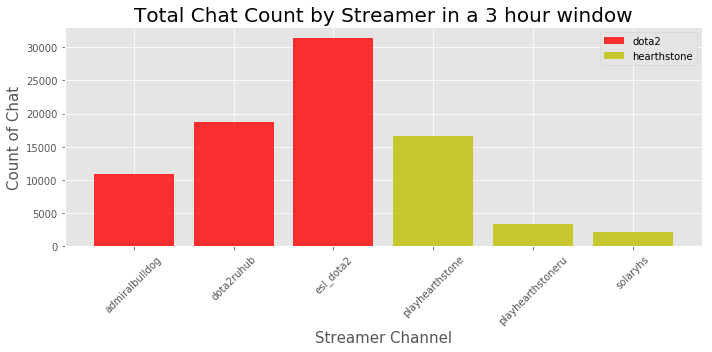

In [617]:
plt.figure(figsize=(10,5))
plt.bar(dota2_channels, dota2_y, alpha=0.8, color='r', label = 'dota2')
plt.bar(hs_channels, hs_y, alpha=0.8, color='y', label = 'hearthstone')
# plt.bar(other, other_y, alpha=0.8, color='grey', label = 'other gaming')
plt.title('Total Chat Count by Streamer in a 3 hour window', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Count of Chat', fontsize=15)
plt.xlabel('Streamer Channel', fontsize=15)
plt.tight_layout()
plt.legend()
plt.savefig('images/bar_chat_count.png', format='png', dpi=500)

### Begin EDA on Twitch Chat Metadata

In [454]:
metafile_list = []

import os
for file in os.listdir(folder):
    if file.endswith(".txt"):
        metafile_list.append(file)
        
metafile_list

['HS_playhearthstoneru_stream_metadata.txt',
 'HS_playhearthstone_stream_metadata.txt',
 'OTHER_edisonparklive_stream_metadata.txt',
 'DOTA_admiralbulldog_stream_metadata.txt',
 'HS_solaryhs_stream_metadata.txt',
 'DOTA_esl_dota2_stream_metadata.txt',
 'DOTA_dota2ruhub_stream_metadata.txt']

### Steamer Channel Metadata Dataframe

#### Function call

In [585]:
 def create_meta_df(mf_list, folder):
    '''
    takes a list of a steamer's chat metadata text files, returns a dataframe of that channel name from the log file
    
    Parameters
    ----------
    mf_list: list (list of text file names)
        must also have an accompany log file in the chat_data_log folder

    Returns
    -------
    pandas dataframe
    '''
    
    line_counter = 1
    
    print("creating meta_df...\n")
    meta_df = pd.DataFrame(columns=['game', 'channel', 'timestamp', 'viewer_count']) #initializes the dataframe
    
    for file in mf_list:
        
        game_type = file[:file.index('_')] #extracts game type
        channel = file[file.index('_')+1:-20] #extracts channel name
        
        print("inserting chat data for: ", channel)
        chat_log_file = folder+"/"+file
    
        with open(chat_log_file, "r") as f:
            for line in f:
                timestamp = datetime.datetime.strptime(line[:26].replace('T',' '),'%Y-%m-%d %H:%M:%S.%f') #2019-05-31T09:55:32.815211
                timestamp = roundTime(timestamp, roundTo=60)
#                 print(timestamp, type(timestamp))
                json = line[26:]
                json_view_count_start = json[json.find('viewer_count')-1+16:]
                json_view_helper = json_view_count_start.find(',')
                viewer_count = int(json_view_count_start[:json_view_helper])
#                 print(viewer_count)
                
                meta_df.loc[line_counter] = (game_type, channel, timestamp, viewer_count)
                line_counter += 1 #line counter
                
    print("\n...meta_df created.")    
    return meta_df

In [586]:
# # problem due to datetime.datetime in the json

# import ast

# x = str({'a':1, 'b':2})
# y = "{'id': '34348315856', 'user_id': '189752674', 'user_name': 'PlayHearthstoneRU', 'game_id': '138585', 'community_ids': [], 'type': 'live', 'title': '[RU] Hearthstone Grandmasters Europe - Week 3 Day 1 @ LEBED & Olesami', 'viewer_count': 4720, 'started_at': datetime.datetime(2019, 5, 31, 14, 26, 17), 'language': 'ru', 'thumbnail_url': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_playhearthstoneru-{width}x{height}.jpg', 'tag_ids': ['0569b171-2a2b-476e-a596-5bdfb45a1327', 'f8d72838-f2c2-4b99-9a59-221174f6169d']}"

# print(y)
# type(ast.literal_eval(y))

#### Create channel metadata dataframe

In [587]:
meta_df = create_meta_df(metafile_list, folder)
meta_df

creating meta_df...

inserting chat data for:  playhearthstoneru
inserting chat data for:  playhearthstone
inserting chat data for:  edisonparklive
inserting chat data for:  admiralbulldog
inserting chat data for:  solaryhs
inserting chat data for:  esl_dota2
inserting chat data for:  dota2ruhub

...meta_df created.


,game,channel,timestamp,viewer_count
1,HS,playhearthstoneru,2019-05-31 09:56:00,4720
2,HS,playhearthstoneru,2019-05-31 09:57:00,4776
3,HS,playhearthstoneru,2019-05-31 09:58:00,4825
4,HS,playhearthstoneru,2019-05-31 09:59:00,4936
5,HS,playhearthstoneru,2019-05-31 10:00:00,5089
6,HS,playhearthstoneru,2019-05-31 10:01:00,5141
7,HS,playhearthstoneru,2019-05-31 10:02:00,5212
8,HS,playhearthstoneru,2019-05-31 10:03:00,5313
9,HS,playhearthstoneru,2019-05-31 10:04:00,5326
10,HS,playhearthstoneru,2019-05-31 10:05:00,5407


### Plotting Viewer Count v Top 5 Word Count Frequency

In [ ]:
#scatterplot
#x = number of viewers
#y = top 5 frequency word count (take it by 1min interval)

Create scatter plot for Dota / Admiral bulldog on viewer v. word count

In [619]:
#viewer_count

admiralbulldog_meta_df = meta_df[meta_df['channel']=='admiralbulldog']

#admiralbulldog_meta_df.head()

,game,channel,timestamp,viewer_count
452,DOTA,admiralbulldog,2019-05-31 09:48:00,6429
453,DOTA,admiralbulldog,2019-05-31 09:49:00,6515
454,DOTA,admiralbulldog,2019-05-31 09:50:00,6570
455,DOTA,admiralbulldog,2019-05-31 09:51:00,6481
456,DOTA,admiralbulldog,2019-05-31 09:52:00,6485


In [628]:
#list of timestamps

admiralbulldog_time_stamp_list = admiralbulldog_meta_df['timestamp'].tolist()
admiralbulldog_time_stamp_list

[Timestamp('2019-05-31 09:48:00'),
 Timestamp('2019-05-31 09:49:00'),
 Timestamp('2019-05-31 09:50:00'),
 Timestamp('2019-05-31 09:51:00'),
 Timestamp('2019-05-31 09:52:00'),
 Timestamp('2019-05-31 09:53:00'),
 Timestamp('2019-05-31 09:54:00'),
 Timestamp('2019-05-31 09:55:00'),
 Timestamp('2019-05-31 09:56:00'),
 Timestamp('2019-05-31 09:57:00'),
 Timestamp('2019-05-31 09:58:00'),
 Timestamp('2019-05-31 09:59:00'),
 Timestamp('2019-05-31 10:00:00'),
 Timestamp('2019-05-31 10:01:00'),
 Timestamp('2019-05-31 10:02:00'),
 Timestamp('2019-05-31 10:03:00'),
 Timestamp('2019-05-31 10:04:00'),
 Timestamp('2019-05-31 10:05:00'),
 Timestamp('2019-05-31 10:06:00'),
 Timestamp('2019-05-31 10:07:00'),
 Timestamp('2019-05-31 10:08:00'),
 Timestamp('2019-05-31 10:09:00'),
 Timestamp('2019-05-31 10:10:00'),
 Timestamp('2019-05-31 10:11:00'),
 Timestamp('2019-05-31 10:12:00'),
 Timestamp('2019-05-31 10:13:00'),
 Timestamp('2019-05-31 10:14:00'),
 Timestamp('2019-05-31 10:15:00'),
 Timestamp('2019-05-

In [230]:
#top 5 words for admiral bulldog

channels = ['admiralbulldog']

admiral_top5 = generate_word_count_list(admiralbulldog_df, channels)[0][1][:5]

admiral_top5_words = []

for d in admiral_top5:
    admiral_top5_words.append(d[0])

print(admiral_top5)
admiral_top5_words

[('jebaited', 1474), ('lulw', 842), ('4head', 651), ('telephonereceiver', 569), ('krappa', 555)]


['jebaited', 'lulw', '4head', 'telephonereceiver', 'krappa']

In [287]:
# pd.set_option('display.max_rows', 500)

# create admiralbulldog df

folder='../chat_log_data/admiralbulldog_analysis'
admiralbulldog_df = create_chat_df(folder)#.sort_values(by = ['game', 'channel', 'timestamp']).reset_index()
# admiralbulldog_df.head()

generating... list of .log files

creating df...

inserting chat data for:  DOTA admiralbulldog
0 timestamp error... 2019-05-31_09:48:04 — :cy_dota2!cy_dota2@cy_dota2.tmi.twitch.tv PRIVMSG #admiralbulldog :Krappa

1 timestamp error... 2019-05-31_09:48:17 — :asavell!asavell@asavell.tmi.twitch.tv PRIVMSG #admiralbulldog :ON STREAM :)

2 timestamp error... :gorgeous_calf!gorgeous_calf@gorgeous_calf.tmi.twitch.tv PRIVMSG #admiralbulldog :GachiW SELLING GIFT FROM WEEBS IS ACCEPTABLE

3 timestamp error... :dreamwalkerdota!dreamwalkerdota@dreamwalkerdota.tmi.twitch.tv PRIVMSG #admiralbulldog :Krappa

4 timestamp error... :amsar2285!amsar2285@amsar2285.tmi.twitch.tv PRIVMSG #admiralbulldog :HES GONNA SELL OFFSTREAM WeirdChamp HES GONNA SELL OFFSTREAM WeirdChamp HES GONNA SELL OFFSTREAM WeirdChamp HES GONNA SELL OFFSTREAM WeirdChamp HES GONNA SELL OFFSTREAM WeirdChamp HES GONNA SELL OFFSTREAM WeirdChamp

5 timestamp error... :jiisokyun!jiisokyun@jiisokyun.tmi.twitch.tv PRIVMSG #admiralbulldog :

864 timestamp error... 2019-05-31_09:54:23 — :p00lz!p00lz@p00lz.tmi.twitch.tv PRIVMSG #admiralbulldog :GabeN

865 timestamp error... 2019-05-31_09:54:24 — :lambdadota!lambdadota@lambdadota.tmi.twitch.tv PRIVMSG #admiralbulldog :-20$ LULW

866 timestamp error... 2019-05-31_09:54:24 — :sajjadziaei!sajjadziaei@sajjadziaei.tmi.twitch.tv PRIVMSG #admiralbulldog :GabeN

867 timestamp error... 2019-05-31_09:54:24 — :bondukdiapitamu!bondukdiapitamu@bondukdiapitamu.tmi.twitch.tv PRIVMSG #admiralbulldog :GabeS

868 timestamp error... 2019-05-31_09:54:24 — :siriusttt!siriusttt@siriusttt.tmi.twitch.tv PRIVMSG #admiralbulldog :LUL

869 timestamp error... 2019-05-31_09:54:24 — :zork1488!zork1488@zork1488.tmi.twitch.tv PRIVMSG #admiralbulldog :GabeN

870 timestamp error... :theresa_may_!theresa_may_@theresa_may_.tmi.twitch.tv PRIVMSG #admiralbulldog :Jebaited

871 timestamp error... 2019-05-31_09:54:24 — :wrathfultobii!wrathfultobii@wrathfultobii.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaS

872 tim

1697 timestamp error... 2019-05-31_10:01:46 — :slime3k!slime3k@slime3k.tmi.twitch.tv PRIVMSG #admiralbulldog :HE IS :)

1698 timestamp error... 2019-05-31_10:01:46 — :ken_kot!ken_kot@ken_kot.tmi.twitch.tv PRIVMSG #admiralbulldog :!roulette

1699 timestamp error... 2019-05-31_10:01:47 — :icexmodex!icexmodex@icexmodex.tmi.twitch.tv PRIVMSG #admiralbulldog :IM D OMEGALUL NE

1700 timestamp error... 2019-05-31_10:01:49 — :manyfriends!manyfriends@manyfriends.tmi.twitch.tv PRIVMSG #admiralbulldog :midone ld LULW

1701 timestamp error... 2019-05-31_10:01:49 — :dotagametwitch!dotagametwitch@dotagametwitch.tmi.twitch.tv PRIVMSG #admiralbulldog :SHITONE LULW

1702 timestamp error... 2019-05-31_10:01:49 — :abydos_vanguard!abydos_vanguard@abydos_vanguard.tmi.twitch.tv PRIVMSG #admiralbulldog :YAPZOR Pog

1703 timestamp error... 2019-05-31_10:01:49 — :bigsmilecharlye!bigsmilecharlye@bigsmilecharlye.tmi.twitch.tv PRIVMSG #admiralbulldog :I'm HELPING Pepega

1704 timestamp error... 2019-05-31_10:01:5

2583 timestamp error... 2019-05-31_10:05:06 — :tozs_!tozs_@tozs_.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaH

2584 timestamp error... 2019-05-31_10:05:06 — :taiyoudaimonji!taiyoudaimonji@taiyoudaimonji.tmi.twitch.tv PRIVMSG #admiralbulldog :PLEBS LULW

2585 timestamp error... 2019-05-31_10:05:06 — :xtiaaaan_!xtiaaaan_@xtiaaaan_.tmi.twitch.tv PRIVMSG #admiralbulldog :PepeHands

2586 timestamp error... 2019-05-31_10:05:06 — :winstoneee!winstoneee@winstoneee.tmi.twitch.tv PRIVMSG #admiralbulldog :PLEBS LULW

2587 timestamp error... 2019-05-31_10:05:06 — :dundledore!dundledore@dundledore.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaH

2588 timestamp error... 2019-05-31_10:05:06 — :dotagametwitch!dotagametwitch@dotagametwitch.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaH

2589 timestamp error... 2019-05-31_10:05:06 — :abrthefreshprince!abrthefreshprince@abrthefreshprince.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaH

2590 timestamp error... 2019-05-31_10:05:07 — :kazoo13_!kazoo13_@kazoo13_

3530 timestamp error... 2019-05-31_10:12:15 — :ravinduputha!ravinduputha@ravinduputha.tmi.twitch.tv PRIVMSG #admiralbulldog :!mydong

3531 timestamp error... 2019-05-31_10:12:15 — :arifess!arifess@arifess.tmi.twitch.tv PRIVMSG #admiralbulldog :PaPaTuTuWaWa

3532 timestamp error... 2019-05-31_10:12:16 — :electralpowder!electralpowder@electralpowder.tmi.twitch.tv PRIVMSG #admiralbulldog :LULW

3533 timestamp error... 2019-05-31_10:12:16 — :5chtief!5chtief@5chtief.tmi.twitch.tv PRIVMSG #admiralbulldog :EleGiggle ? EleGiggle ?

3534 timestamp error... 2019-05-31_10:12:16 — :bikapikachu!bikapikachu@bikapikachu.tmi.twitch.tv PRIVMSG #admiralbulldog :why sandking so useless? :)

3535 timestamp error... 2019-05-31_10:12:16 — :zuza94!zuza94@zuza94.tmi.twitch.tv PRIVMSG #admiralbulldog :What a draft

3536 timestamp error... 2019-05-31_10:12:17 — :ajy3256!ajy3256@ajy3256.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaS

3537 timestamp error... 2019-05-31_10:12:17 — :yobineshu!yobineshu@yobineshu.tmi

4530 timestamp error... 2019-05-31_10:18:49 — :j_god_yamaxanadu!j_god_yamaxanadu@j_god_yamaxanadu.tmi.twitch.tv PRIVMSG #admiralbulldog :PepeScoots

4531 timestamp error... 2019-05-31_10:18:49 — :herr_azura!herr_azura@herr_azura.tmi.twitch.tv PRIVMSG #admiralbulldog :Bruh

4532 timestamp error... 2019-05-31_10:18:49 — :germanygermany1!germanygermany1@germanygermany1.tmi.twitch.tv PRIVMSG #admiralbulldog :Bruh

4533 timestamp error... 2019-05-31_10:18:49 — :bababooey1215!bababooey1215@bababooey1215.tmi.twitch.tv PRIVMSG #admiralbulldog :WutFace

4534 timestamp error... 2019-05-31_10:18:49 — :quokka193!quokka193@quokka193.tmi.twitch.tv PRIVMSG #admiralbulldog :Bruh Bruh

4535 timestamp error... 2019-05-31_10:18:49 — :homeless_emperor!homeless_emperor@homeless_emperor.tmi.twitch.tv PRIVMSG #admiralbulldog :WutFace

4536 timestamp error... 2019-05-31_10:18:49 — :umattt!umattt@umattt.tmi.twitch.tv PRIVMSG #admiralbulldog :Bruh

4537 timestamp error... 2019-05-31_10:18:49 — :giggiegasm!giggi

5530 timestamp error... 2019-05-31_10:24:02 — :shifty313!shifty313@shifty313.tmi.twitch.tv PRIVMSG #admiralbulldog :use your ult

5531 timestamp error... 2019-05-31_10:24:03 — :now_we_riot_grrrrrrrrrrrr!now_we_riot_grrrrrrrrrrrr@now_we_riot_grrrrrrrrrrrr.tmi.twitch.tv PRIVMSG #admiralbulldog :Jebaited

5532 timestamp error... 2019-05-31_10:24:03 — :zuza94!zuza94@zuza94.tmi.twitch.tv PRIVMSG #admiralbulldog :Not anymore LULW

5533 timestamp error... 2019-05-31_10:24:03 — :eybiecie!eybiecie@eybiecie.tmi.twitch.tv PRIVMSG #admiralbulldog :Pepega elfff

5534 timestamp error... 2019-05-31_10:24:04 — :the1bernie!the1bernie@the1bernie.tmi.twitch.tv PRIVMSG #admiralbulldog :IM ALIVE Krappa

5535 timestamp error... 2019-05-31_10:24:04 — :cirkuspoliceman!cirkuspoliceman@cirkuspoliceman.tmi.twitch.tv PRIVMSG #admiralbulldog :ELP WutFace

5536 timestamp error... 2019-05-31_10:24:04 — :rubickasd_xd!rubickasd_xd@rubickasd_xd.tmi.twitch.tv PRIVMSG #admiralbulldog :!Seppuku

5537 timestamp error... 20


6530 timestamp error... 2019-05-31_10:26:54 — :irfamous!irfamous@irfamous.tmi.twitch.tv PRIVMSG #admiralbulldog :Bruh

6531 timestamp error... 2019-05-31_10:26:54 — :lottozynga2!lottozynga2@lottozynga2.tmi.twitch.tv PRIVMSG #admiralbulldog :Bruh

6532 timestamp error... 2019-05-31_10:26:55 — :fa_danym!fa_danym@fa_danym.tmi.twitch.tv PRIVMSG #admiralbulldog :@AdmiralBulldog ACTUALLY A GOD GAMER

6533 timestamp error... 2019-05-31_10:26:55 — :viten!viten@viten.tmi.twitch.tv PRIVMSG #admiralbulldog :Pepega music

6534 timestamp error... 2019-05-31_10:26:55 — :yubi_m!yubi_m@yubi_m.tmi.twitch.tv PRIVMSG #admiralbulldog :Bruh

6535 timestamp error... 2019-05-31_10:26:55 — :dazzdingoo_!dazzdingoo_@dazzdingoo_.tmi.twitch.tv PRIVMSG #admiralbulldog :cmonBruh

6536 timestamp error... 2019-05-31_10:26:56 — :doppelfey!doppelfey@doppelfey.tmi.twitch.tv PRIVMSG #admiralbulldog :Bruh MODS

6537 timestamp error... 2019-05-31_10:26:56 — :wanilldestroyer!wanilldestroyer@wanilldestroyer.tmi.twitch.tv PR

7529 timestamp error... 2019-05-31_10:30:14 — :watchdotoonlybutnotreally!watchdotoonlybutnotreally@watchdotoonlybutnotreally.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaS

7530 timestamp error... 2019-05-31_10:30:14 — :terrorlegion!terrorlegion@terrorlegion.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaGIGA

7531 timestamp error... 2019-05-31_10:30:14 — :vallist!vallist@vallist.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaGIGA

7532 timestamp error... 2019-05-31_10:30:14 — :kappafangay97!kappafangay97@kappafangay97.tmi.twitch.tv PRIVMSG #admiralbulldog :LULW

7533 timestamp error... 2019-05-31_10:30:14 — :necromancer_coffee!necromancer_coffee@necromancer_coffee.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaGIGA

7534 timestamp error... 2019-05-31_10:30:14 — :david100net!david100net@david100net.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaGIGA monkaGIGA monkaGIGA

7535 timestamp error... 2019-05-31_10:30:14 — :sukjustin4!sukjustin4@sukjustin4.tmi.twitch.tv PRIVMSG #admiralbulldog :monkaGIGA



8529 timestamp error... 2019-05-31_10:52:04 — :fareeeeeeeed!fareeeeeeeed@fareeeeeeeed.tmi.twitch.tv PRIVMSG #admiralbulldog :Fuck i knew that xd

8530 timestamp error... 2019-05-31_10:52:11 — :admiralbullbot!admiralbullbot@admiralbullbot.tmi.twitch.tv PRIVMSG #admiralbulldog :ACTION PogChamp A new question has begun! In the category "D DansGame TA", the question is "Which team had the highest KDA at TI8?" :thinking_face:

8531 timestamp error... 2019-05-31_10:52:17 — :fareeeeeeeed!fareeeeeeeed@fareeeeeeeed.tmi.twitch.tv PRIVMSG #admiralbulldog :team secret

8532 timestamp error... 2019-05-31_10:52:18 — :lordkickawesome!lordkickawesome@lordkickawesome.tmi.twitch.tv PRIVMSG #admiralbulldog :Liquid

8533 timestamp error... 2019-05-31_10:52:19 — :climbingishard!climbingishard@climbingishard.tmi.twitch.tv PRIVMSG #admiralbulldog :eg

8534 timestamp error... 2019-05-31_10:52:21 — :fareeeeeeeed!fareeeeeeeed@fareeeeeeeed.tmi.twitch.tv PRIVMSG #admiralbulldog :LGD

8535 timestamp error... 201

9529 timestamp error... 2019-05-31_12:06:21 — :admiralbullbot!admiralbullbot@admiralbullbot.tmi.twitch.tv PRIVMSG #admiralbulldog :ACTION OpieOP Here's a hint, "Politi________" OpieOP

9530 timestamp error... 2019-05-31_12:06:22 — :lordkickawesome!lordkickawesome@lordkickawesome.tmi.twitch.tv PRIVMSG #admiralbulldog :leftist

9531 timestamp error... 2019-05-31_12:06:28 — :owo_two!owo_two@owo_two.tmi.twitch.tv PRIVMSG #admiralbulldog :politiphobe

9532 timestamp error... 2019-05-31_12:06:31 — :admiralbullbot!admiralbullbot@admiralbullbot.tmi.twitch.tv PRIVMSG #admiralbulldog :ACTION MingLee No one could answer the trivia! The answer was "Politicophobia" MingLee. Since you're all useless, DatGuy gets one point.

9533 timestamp error... 2019-05-31_12:06:43 — :admiralbullbot!admiralbullbot@admiralbullbot.tmi.twitch.tv PRIVMSG #admiralbulldog :ACTION PogChamp A new question has begun! In the category "History", the question is "The Roman numeral "L" stands for what number?" :thinking_f

10529 timestamp error... 2019-05-31_13:10:10 — :admiralbullbot!admiralbullbot@admiralbullbot.tmi.twitch.tv PRIVMSG #admiralbulldog :ACTION MingLee No one could answer the trivia! The answer was "Frogger" MingLee. Since you're all useless, DatGuy gets one point.

10530 timestamp error... 2019-05-31_13:10:22 — :admiralbullbot!admiralbullbot@admiralbullbot.tmi.twitch.tv PRIVMSG #admiralbulldog :ACTION PogChamp A new question has begun! In the category "Science", the question is "What compound makes up around 60% of the human body weight?" :thinking_face:

10531 timestamp error... 2019-05-31_13:10:29 — :ktqkdwh!ktqkdwh@ktqkdwh.tmi.twitch.tv PRIVMSG #admiralbulldog :water

10532 timestamp error... 2019-05-31_13:10:30 — :admiralbullbot!admiralbullbot@admiralbullbot.tmi.twitch.tv PRIVMSG #admiralbulldog :ACTION ktqkDWH got the answer right! The answer was Water FeelsGoodMan They get 20 points! PogChamp

10533 timestamp error... 2019-05-31_13:10:36 — :lordkickawesome!lordkickawesome@lord

TypeError: can only concatenate str (not "int") to str

In [ ]:
admiralbulldog_df

In [231]:
#remove bot user who was spamming

admiralbulldog_df = admiralbulldog_df[admiralbulldog_df['user_name'] != 'admiralbullbot']
admiralbulldog_df


,game,channel,timestamp,user_name,chat_msg
0,DOTA,admiralbulldog,2019-05-31 09:48:00,cy_dota2,Krappa
1,DOTA,admiralbulldog,2019-05-31 09:48:00,asavell,ON STREAM :)
24,DOTA,admiralbulldog,2019-05-31 09:48:00,gandor87,WHY IS IT PAUSED PepeHands
25,DOTA,admiralbulldog,2019-05-31 09:48:00,nobody1564,LULW
26,DOTA,admiralbulldog,2019-05-31 09:48:00,not_that_guy,@AdmiralBulldog what is the site where you can...
27,DOTA,admiralbulldog,2019-05-31 09:48:00,doppelfey,D:
28,DOTA,admiralbulldog,2019-05-31 09:48:00,pandarexx,Pog
29,DOTA,admiralbulldog,2019-05-31 09:48:00,berkaythereyiz_,Krappa
30,DOTA,admiralbulldog,2019-05-31 09:48:00,wothmassu,WTFF
31,DOTA,admiralbulldog,2019-05-31 09:48:00,murkyx,FeelsBadMan


In [692]:
# #create timestamp index in df

# admiralbulldog_timestamp_df = admiralbulldog_df.set_index('timestamp')
# admiralbulldog_timestamp_df

In [232]:
#joins the text by timestamp

#this may cause duplicates for one post with the same word twice, but the frequency of this happening is < 1%

admiralbulldog_chat_by_timestamp_df = admiralbulldog_df.groupby('timestamp')

admiralbulldog_chat_by_timestamp_df2 = admiralbulldog_chat_by_timestamp_df['chat_msg'].apply(','.join).reset_index()

admiralbulldog_chat_by_timestamp_df2.head()

,timestamp,chat_msg
0,2019-05-31 09:48:00,"Krappa,ON STREAM :),WHY IS IT PAUSED PepeHands..."
1,2019-05-31 09:49:00,"Krappa,other Krappa,balancelot!!,OMEGALUL,Pog,..."
2,2019-05-31 09:50:00,"If you truly like me chat, you'd give me some ..."
3,2019-05-31 09:51:00,"missed one tho,D:,WutFace WutFace WutFace WutF..."
4,2019-05-31 09:52:00,"OMEGAWOW,Pog,Pog,OSFrog,OMEGAWOW,!dotabet dire..."


In [216]:
admiralbulldog_chat_by_timestamp_df

In [233]:
#creates word_count collection on chat_msg

from collections import Counter

admiralbulldog_chat_by_timestamp_df2['word_count'] = admiralbulldog_chat_by_timestamp_df2['chat_msg'].apply(lambda x: Counter(x.lower().replace(","," ").split(' ')))

In [234]:
admiralbulldog_chat_by_timestamp_df2.head()

,timestamp,chat_msg,word_count
0,2019-05-31 09:48:00,"Krappa,ON STREAM :),WHY IS IT PAUSED PepeHands...","{'krappa': 6, 'on': 1, 'stream': 1, ':)': 2, '..."
1,2019-05-31 09:49:00,"Krappa,other Krappa,balancelot!!,OMEGALUL,Pog,...","{'krappa': 18, 'other': 2, 'balancelot!!': 1, ..."
2,2019-05-31 09:50:00,"If you truly like me chat, you'd give me some ...","{'if': 2, 'you': 3, 'truly': 1, 'like': 1, 'me..."
3,2019-05-31 09:51:00,"missed one tho,D:,WutFace WutFace WutFace WutF...","{'missed': 1, 'one': 1, 'tho': 1, 'd:': 1, 'wu..."
4,2019-05-31 09:52:00,"OMEGAWOW,Pog,Pog,OSFrog,OMEGAWOW,!dotabet dire...","{'omegawow': 8, 'pog': 10, 'osfrog': 1, '!dota..."


In [240]:
#creates a msg_count per timestamp based on word_count

admiralbulldog_chat_by_timestamp_df2['msg_count'] = admiralbulldog_chat_by_timestamp_df2['word_count'].apply(lambda x: sum(x.values()))

In [241]:
admiralbulldog_chat_by_timestamp_df2.head()

,timestamp,chat_msg,word_count,msg_count,top_5_words
0,2019-05-31 09:48:00,"Krappa,ON STREAM :),WHY IS IT PAUSED PepeHands...","{'krappa': 6, 'on': 1, 'stream': 1, ':)': 2, '...",63,"{'jebaited': None, 'lulw': 3, '4head': None, '..."
1,2019-05-31 09:49:00,"Krappa,other Krappa,balancelot!!,OMEGALUL,Pog,...","{'krappa': 18, 'other': 2, 'balancelot!!': 1, ...",280,"{'jebaited': None, 'lulw': 20, '4head': None, ..."
2,2019-05-31 09:50:00,"If you truly like me chat, you'd give me some ...","{'if': 2, 'you': 3, 'truly': 1, 'like': 1, 'me...",368,"{'jebaited': None, 'lulw': 8, '4head': None, '..."
3,2019-05-31 09:51:00,"missed one tho,D:,WutFace WutFace WutFace WutF...","{'missed': 1, 'one': 1, 'tho': 1, 'd:': 1, 'wu...",243,"{'jebaited': None, 'lulw': 9, '4head': 8, 'tel..."
4,2019-05-31 09:52:00,"OMEGAWOW,Pog,Pog,OSFrog,OMEGAWOW,!dotabet dire...","{'omegawow': 8, 'pog': 10, 'osfrog': 1, '!dota...",383,"{'jebaited': None, 'lulw': 10, '4head': None, ..."


In [248]:
#creates two additional columsn in the df
#1. helper function 'top_5_words' - creates a new dictionary that consists of the top 5 words among all words of the channel
#2. sums the value of the helper function

top5_words = admiral_top5_words

# admiralbulldog_chat_by_timestamp_df2['top_5_words'] = admiralbulldog_chat_by_timestamp_df2['word_count'].apply(lambda x: {k: x[k] for k in top5_words})

def new_dict(d, top_5):
    return {k: d.get(k,0) for k in top_5}

admiralbulldog_chat_by_timestamp_df2['top_5_words'] = admiralbulldog_chat_by_timestamp_df2['word_count'].apply(lambda x: new_dict(dict(x), top5_words))

In [249]:
admiralbulldog_chat_by_timestamp_df2.head()

,timestamp,chat_msg,word_count,msg_count,top_5_words
0,2019-05-31 09:48:00,"Krappa,ON STREAM :),WHY IS IT PAUSED PepeHands...","{'krappa': 6, 'on': 1, 'stream': 1, ':)': 2, '...",63,"{'jebaited': 0, 'lulw': 3, '4head': 0, 'teleph..."
1,2019-05-31 09:49:00,"Krappa,other Krappa,balancelot!!,OMEGALUL,Pog,...","{'krappa': 18, 'other': 2, 'balancelot!!': 1, ...",280,"{'jebaited': 0, 'lulw': 20, '4head': 0, 'telep..."
2,2019-05-31 09:50:00,"If you truly like me chat, you'd give me some ...","{'if': 2, 'you': 3, 'truly': 1, 'like': 1, 'me...",368,"{'jebaited': 0, 'lulw': 8, '4head': 0, 'teleph..."
3,2019-05-31 09:51:00,"missed one tho,D:,WutFace WutFace WutFace WutF...","{'missed': 1, 'one': 1, 'tho': 1, 'd:': 1, 'wu...",243,"{'jebaited': 0, 'lulw': 9, '4head': 8, 'teleph..."
4,2019-05-31 09:52:00,"OMEGAWOW,Pog,Pog,OSFrog,OMEGAWOW,!dotabet dire...","{'omegawow': 8, 'pog': 10, 'osfrog': 1, '!dota...",383,"{'jebaited': 0, 'lulw': 10, '4head': 0, 'telep..."


In [250]:
admiralbulldog_chat_by_timestamp_df2['top5_count'] = admiralbulldog_chat_by_timestamp_df2['top_5_words'].apply(lambda x: sum(x.values()))

In [251]:
admiralbulldog_chat_by_timestamp_df2.head()

,timestamp,chat_msg,word_count,msg_count,top_5_words,top5_count
0,2019-05-31 09:48:00,"Krappa,ON STREAM :),WHY IS IT PAUSED PepeHands...","{'krappa': 6, 'on': 1, 'stream': 1, ':)': 2, '...",63,"{'jebaited': 0, 'lulw': 3, '4head': 0, 'teleph...",9
1,2019-05-31 09:49:00,"Krappa,other Krappa,balancelot!!,OMEGALUL,Pog,...","{'krappa': 18, 'other': 2, 'balancelot!!': 1, ...",280,"{'jebaited': 0, 'lulw': 20, '4head': 0, 'telep...",38
2,2019-05-31 09:50:00,"If you truly like me chat, you'd give me some ...","{'if': 2, 'you': 3, 'truly': 1, 'like': 1, 'me...",368,"{'jebaited': 0, 'lulw': 8, '4head': 0, 'teleph...",9
3,2019-05-31 09:51:00,"missed one tho,D:,WutFace WutFace WutFace WutF...","{'missed': 1, 'one': 1, 'tho': 1, 'd:': 1, 'wu...",243,"{'jebaited': 0, 'lulw': 9, '4head': 8, 'teleph...",43
4,2019-05-31 09:52:00,"OMEGAWOW,Pog,Pog,OSFrog,OMEGAWOW,!dotabet dire...","{'omegawow': 8, 'pog': 10, 'osfrog': 1, '!dota...",383,"{'jebaited': 0, 'lulw': 10, '4head': 0, 'telep...",40


In [714]:
datetime.datetime.strptime('2019-05-31 09:49:00','%Y-%m-%d %H:%M:%S')

datetime.datetime(2019, 5, 31, 9, 49)

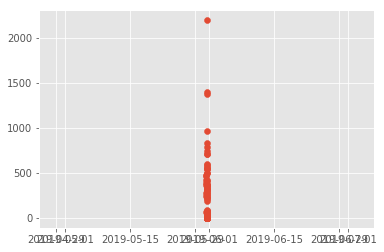

In [269]:
x = admiralbulldog_chat_by_timestamp_df2['timestamp'].tolist()
y = admiralbulldog_chat_by_timestamp_df2['msg_count'].tolist()

plt.scatter(x,y)

In [285]:
print(type(x[0]))
x[0].to_pydatetime()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


datetime.datetime(2019, 5, 31, 9, 48)

In [271]:

timestamp = x[0]
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

TypeError: an integer is required (got type Timestamp)

In [274]:
import time
ts = time.gmtime()
print(type(ts))
print(time.strftime("%Y-%m-%d %H:%M:%S", ts))
# 2019-06-02 05:25:29



<class 'time.struct_time'>
2019-06-02 03:26:22


In [1]:
# for time in admiralbulldog_time_stamp_list:
#     print(admiralbulldog_chat_by_timestamp_df2[time])

In [ ]:
# look for unique twitch chat users, plot against time, find peaks to indicate interesting content